In [116]:
import pandas as pd
import glob, os
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from  scipy.stats import circmean, circstd
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


In [131]:
PATH = '/Volumes/home/Research/STEP/02_Station_result_csv/'
SAVEpath = '/Volumes/home/Research/STEP/09_histogram_stat/catalog2'
phase= 'SKS'
DATApath = f'/Volumes/home/Research/STEP/01_Split/DATA_{phase}_Mw*'
Class_west=['BCA','ABST','TKBL','AMBR','URAV','ONI']
Class_far=['GUDA','GUDG','DDFL','LGD','GANJ']
### for catalog2
Class_lesser=['BKRG','BURN','BRNG','AKH','GANZ','BGD','AZMN','BAUR','DMNI','TRLT','TRLG','KZRT','TBLG']
Class_am=['SHEN','ZARN','VAND','BYUR','ARZA','GNI','GERK','LICH','TSAP','TASB','MAGY','ALAV','NAVR','QZX']

### for catalog1
# Class_lesser=['BKRG','BURN','BRNG','AKH','GANZ','BGD','AZMN','BAUR','DMNI','TRLT','TRLG','KZRT','MAGY','ALAV','NAVR','QZX','TBLG']
# Class_am=['SHEN','ZARN','VAND','BYUR','ARZA','GNI','GERK','LICH','TSAP','TASB']

Class = {'West':Class_west,
            'Lesser': Class_lesser,
            'AM': Class_am,
            'Far': Class_far}


In [132]:
def Calc_rho(RCdt, SCdt):
    rho = RCdt/SCdt 
    return rho
def Calc_Phi(RCPhi, SCPhi):
    Phi = max (abs(RCPhi-SCPhi), abs(SCPhi-RCPhi))
    if Phi > 90: Phi = 180 - Phi
    return Phi
def RCcoeff(DATApath,STA,event):
    RCfile = glob.glob(f'{DATApath}/*.{STA}/{event}/RC_res_manual.pkl')[0]
    RCpkl  = pickle.load(open(RCfile, "rb"))
    coeff  = abs(RCpkl.errc)
    return coeff
    
def angle_mean(dt, phi, ddt, dphi):
    dt=np.array(dt)
    phi=np.array(phi)
    ddt=np.array(ddt)
    dphi=np.array(dphi)
    x = dt*np.cos(2*phi*np.pi/180.0)
    y = dt*np.sin(2*phi*np.pi/180.0)
    c = x + 1j*y
    m = np.mean(c)

    phase = np.angle(m, deg=True)/2.
    radius = np.abs(m)
    dphase = np.sqrt(np.sum(dphi**2))/len(x)
    dradius = np.sqrt(np.sum(ddt**2))/len(x)
    print(phase, dphase, radius, dradius)
    return phase, dphase, radius, dradius

## Standard 1 

In [135]:
for key in Class.keys():
    locals()[f'df_{key}'] = {'station':[],'RCphi':[],'RCDphi':[],'RCdt':[],'RCDdt':[],'SCphi':[],'SCDphi':[],'SCdt':[],'SCDdt':[],'Null':[],'Quality':[]}
    for sta in Class[key]:
        for csvpath in glob.glob(f'{PATH}/*SKS/*{sta}*csv'):
            df = pd.read_csv(csvpath)
            df = df[df['Pick']==True][df['SNRQ']>=5]
            for i in range(len(df)):
                RCPhi = df['RCPhi'].values[i]
                RCDPhi  = df['RCPhi_std'].values[i]
                RCdt  = df['RCdt'].values[i]
                RCDdt  = df['RCdt_std'].values[i]
                SCPhi = df['SCPhi'].values[i]
                SCDPhi  = df['SCPhi_std'].values[i]
                SCdt  = df['SCdt'].values[i]
                SCDdt  = df['SCdt_std'].values[i]
                
                rho = Calc_rho(RCdt, SCdt)
                phi = Calc_Phi(RCPhi, SCPhi)
                
                if 25 < phi < 68 or df["CpH"].values[i] > 0.76 :
                    Null = True
                    if df["CpH"].values[i] >= 0.90:
                        Quality = 'Good'
                    else: Quality = 'Fair'
                elif 0.8 < rho < 1.1 and phi < 8:## non-null good condition 
                    Null = False
                    Quality = 'Good'
                elif 0.7 <= rho < 1.2 and phi <= 25: ## non-null FAIR condition 
                    Null = False
                    Quality = 'Fair'
                else: 
                    Null = False
                    Quality = 'Poor'
                locals()[f'df_{key}']['station'].append(sta)    
                locals()[f'df_{key}']['RCphi'].append(RCPhi)
                locals()[f'df_{key}']['RCdt'].append(RCdt)
                locals()[f'df_{key}']['RCDphi'].append(RCDPhi)
                locals()[f'df_{key}']['RCDdt'].append(RCDdt)
                locals()[f'df_{key}']['SCphi'].append(SCPhi)
                locals()[f'df_{key}']['SCdt'].append(SCdt)
                locals()[f'df_{key}']['SCDphi'].append(SCDPhi)
                locals()[f'df_{key}']['SCDdt'].append(SCDdt)
                locals()[f'df_{key}']['Null'].append(Null)
                locals()[f'df_{key}']['Quality'].append(Quality)
    locals()[f'df_{key}'] = pd.DataFrame(locals()[f'df_{key}'])

/var/folders/sp/pnngww1n0q31w2plgbk53rc00000gn/T/ipykernel_69406/2345312443.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Pick']==True][df['SNRQ']>=5]


## Standard2

In [133]:
for key in Class.keys():
    locals()[f'df_{key}'] = {'station':[],'RCphi':[],'RCDphi':[],'RCdt':[],'RCDdt':[],'SCphi':[],'SCDphi':[],'SCdt':[],'SCDdt':[],'Null':[],'Quality':[]}
    for sta in Class[key]:
#         print('='*50)
        for csvpath in glob.glob(f'{PATH}/*SKS/*{sta}*csv'):
            df = pd.read_csv(csvpath)
            df = df[df['Pick']==True][df['SNRQ']>=5][df['Phase']=='SKS']
            for i in range(len(df)):
                evtTime = df['Event'].values[i]
                RCPhi = df['RCPhi'].values[i]
                RCDPhi  = df['RCPhi_std'].values[i]
                RCdt  = df['RCdt'].values[i]
                RCDdt  = df['RCdt_std'].values[i]
                SCPhi = df['SCPhi'].values[i]
                SCDPhi  = df['SCPhi_std'].values[i]
                SCdt  = df['SCdt'].values[i]
                SCDdt  = df['SCdt_std'].values[i]
                CpH = df['CpH'].values[i]
                
                rho = Calc_rho(RCdt, SCdt)
                phi = Calc_Phi(RCPhi, SCPhi)
                coeff = RCcoeff(DATApath,sta,evtTime)
                
                if CpH <=0.76 and SCdt<2.5 :
                    Null = False
                    if (SCDPhi <20 and SCDdt<0.5 and coeff >=0.8):
                        Quality = 'Good'
                    elif phi <10:
                        Quality = 'Good'
                    elif (SCDPhi <=30 and SCDdt<=1.0 and coeff >=0.8) :
                        Quality = 'Fair'
                    elif (10 <= phi <25): 
                        Quality = 'Fair'
                    else: 
                        Quality = 'Poor'
                else:
                    Null = True
                    if CpH>=0.9:
                        Quality = 'Good'
                    else: Quality = 'Fair'
                locals()[f'df_{key}']['station'].append(sta)    
                locals()[f'df_{key}']['RCphi'].append(RCPhi)
                locals()[f'df_{key}']['RCdt'].append(RCdt)
                locals()[f'df_{key}']['RCDphi'].append(RCDPhi)
                locals()[f'df_{key}']['RCDdt'].append(RCDdt)
                locals()[f'df_{key}']['SCphi'].append(SCPhi)
                locals()[f'df_{key}']['SCdt'].append(SCdt)
                locals()[f'df_{key}']['SCDphi'].append(SCDPhi)
                locals()[f'df_{key}']['SCDdt'].append(SCDdt)
                locals()[f'df_{key}']['Null'].append(Null)
                locals()[f'df_{key}']['Quality'].append(Quality)
    locals()[f'df_{key}'] = pd.DataFrame(locals()[f'df_{key}'])

/var/folders/sp/pnngww1n0q31w2plgbk53rc00000gn/T/ipykernel_69406/2327327606.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Pick']==True][df['SNRQ']>=5][df['Phase']=='SKS']


## To plot

qwqwq
48.446450908 3.30688379629 1.11219151803 0.0915394912486
42.4039921051 6.5674645135 1.08896863943 0.143830808895


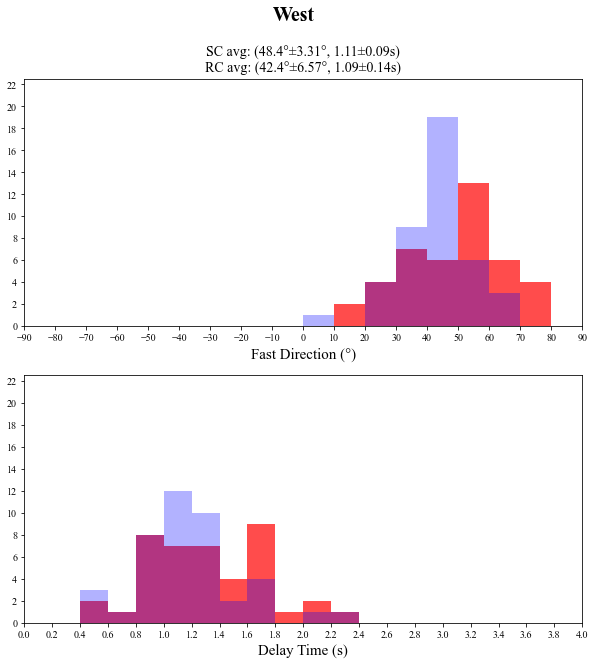

qwqwq
42.5054798664 2.98130846838 0.992173566788 0.083091660585
44.2426371946 6.45351837752 0.991280561561 0.135982632716


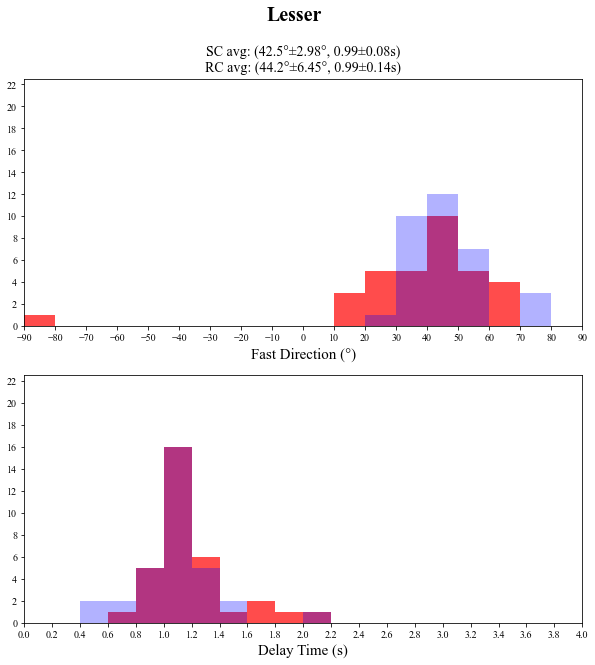

qwqwq
53.0753373172 4.19774163187 0.613463448922 0.0996550979426
59.0922886399 5.55362427851 0.650669808074 0.122355006434


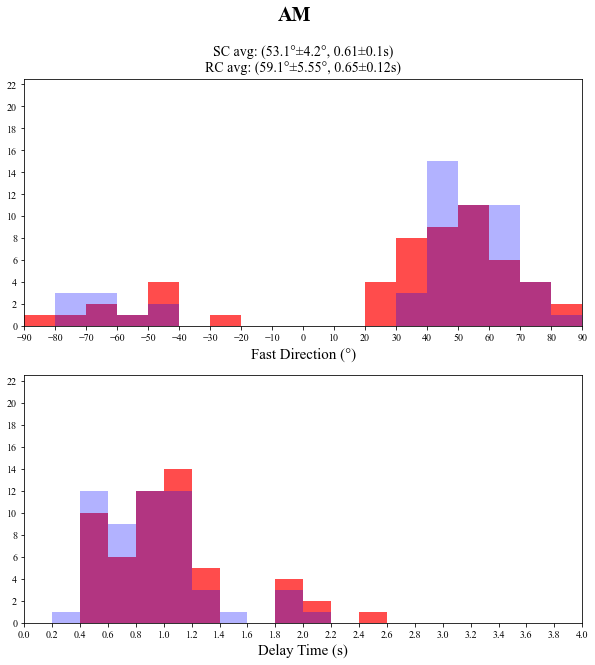

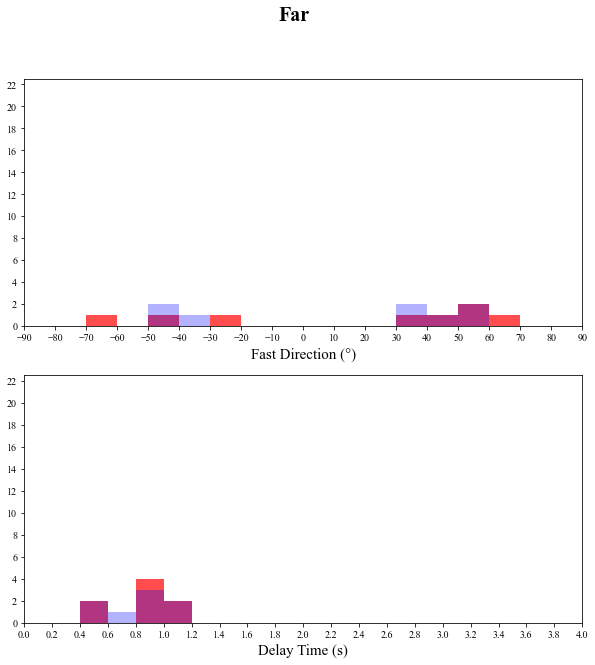

In [136]:
plt.rc('font',family='Times New Roman')
bin_phi=np.arange(-90,90+1,10)
bin_dt=np.arange(0,4+0.1,0.2)
for key in Class.keys():
    plt.figure(figsize=(10,10))
    newdf = locals()[f'df_{key}'][locals()[f'df_{key}']['Null']==False]
    newdf = newdf[newdf['Quality']!='Poor']

    ax1 = plt.subplot(211)
    nS,binsS,jR=plt.hist(newdf['SCphi'],bins=bin_phi, width=10, alpha=0.7,color='red')
    nR,binsS,jR=plt.hist(newdf['RCphi'],bins=bin_phi, width=10, alpha=0.3,color='blue')
    plt.xlim(-90,90)
    plt.ylim(0,22.5)
    plt.xlabel('Fast Direction (°)',fontsize=15)
    ax1.xaxis.set_major_locator(MultipleLocator(10))
    ax1.yaxis.set_major_locator(MultipleLocator(2))
    ax2 = plt.subplot(212)
    plt.hist(newdf['SCdt'],bins=bin_dt, width=0.2, alpha=0.7,color='red')
    plt.hist(newdf['RCdt'],bins=bin_dt, width=0.2, alpha=0.3,color='blue')
    plt.xlim(0,4)
    plt.ylim(0,22.5)
    plt.xlabel('Delay Time (s)',fontsize=15)
    ax2.xaxis.set_major_locator(MultipleLocator(0.2))
    ax2.yaxis.set_major_locator(MultipleLocator(2))

    if key == 'West' or key == 'Lesser' or key == 'AM':
        print('qwqwq')
        avg_angle_SC,std_angle_SC,avg_dt_SC,std_dt_SC = angle_mean(newdf['SCdt'], newdf['SCphi'], newdf['SCDdt'], newdf['SCDphi'])
        avg_angle_RC,std_angle_RC,avg_dt_RC,std_dt_RC = angle_mean(newdf['RCdt'], newdf['RCphi'], newdf['RCDdt'], newdf['RCDphi'])
        plt.subplot(211)
        plt.title(f'SC avg: ({round(avg_angle_SC,1)}°±{round(std_angle_SC,2)}°, {round(avg_dt_SC,2)}±{round(std_dt_SC,2)}s)\nRC avg: ({round(avg_angle_RC,1)}°±{round(std_angle_RC,2)}°, {round(avg_dt_RC,2)}±{round(std_dt_RC,2)}s)',fontsize=14)
#     elif key == 'AM':
#         print('ewewewewew')
#         caldf = newdf[newdf['SCphi']>0]
#         avg_angle_SC,std_angle_SC,avg_dt_SC,std_dt_SC = angle_mean(caldf['SCdt'], caldf['SCphi'], caldf['SCDdt'], caldf['SCDphi'])
#         avg_angle_RC,std_angle_RC,avg_dt_RC,std_dt_RC = angle_mean(caldf['RCdt'], caldf['RCphi'], caldf['RCDdt'], caldf['RCDphi'])
#         plt.subplot(211)
#         plt.text(x=25,y=19,s=f'SC avg: ({round(avg_angle_SC,1)}°±{round(std_angle_SC,0)}°, {round(avg_dt_SC,2)}±{round(std_dt_SC,1)}s)\nRC avg: ({round(avg_angle_RC,1)}°±{round(std_angle_RC,0)}°, {round(avg_dt_RC,2)}±{round(std_dt_RC,1)}s)',fontsize=14)            

#         caldf_ = newdf[newdf['SCphi']<0]
#         avg_angle_SC,std_angle_SC,avg_dt_SC,std_dt_SC = angle_mean(caldf_['SCdt'], caldf_['SCphi'], caldf_['SCDdt'], caldf_['SCDphi'])
#         avg_angle_RC,std_angle_RC,avg_dt_RC,std_dt_RC = angle_mean(caldf_['RCdt'], caldf_['RCphi'], caldf_['RCDdt'], caldf_['RCDphi']) 
#         plt.text(x=-80,y=8,s=f'SC avg: ({round(avg_angle_SC,1)}°±{round(std_angle_SC,0)}°, {round(avg_dt_SC,2)}±{round(std_dt_SC,1)}s)\nRC avg: ({round(avg_angle_RC,1)}°±{round(std_angle_RC,0)}°, {round(avg_dt_RC,2)}±{round(std_dt_RC,1)}s)',ha='left',fontsize=12)
    plt.suptitle(key,fontsize=20,fontweight='bold')
    plt.savefig(f'{SAVEpath}/Histogram_{key}.png',dpi=150,bbox_inches='tight',facecolor='white')
    plt.savefig(f'{SAVEpath}/Histogram_{key}.pdf')
    plt.show()
    plt.close()

## T-test

In [83]:
from scipy.stats import ttest_1samp, ttest_ind

In [58]:
for key in Class.keys():
    print(key)
    newdf = locals()[f'df_{key}'][locals()[f'df_{key}']['Null']==False]
    newdf = newdf[newdf['Quality']!='Poor']

    if key == 'West' or key == 'Lesser' or key == 'AM':
        avg_angle_SC,std_angle_SC,avg_dt_SC,std_dt_SC = angle_mean(newdf['SCdt'], newdf['SCphi'], newdf['SCDdt'], newdf['SCDphi'])
        avg_angle_RC,std_angle_RC,avg_dt_RC,std_dt_RC = angle_mean(newdf['RCdt'], newdf['RCphi'], newdf['RCDdt'], newdf['RCDphi'])
        print('============SC')
        print(avg_angle_SC,std_angle_SC,avg_dt_SC,std_dt_SC)
        
        SCresults = ttest_1samp(newdf['SCphi'], avg_angle_SC)
        print(SCresults)
        print('============RC')
        print(avg_angle_RC,std_angle_RC,avg_dt_RC,std_dt_RC)
        RCresults = ttest_1samp(newdf['RCphi'], avg_angle_RC)
        print(RCresults)

West
============SC
48.446450908 3.30688379629 1.11219151803 0.0915394912486
Ttest_1sampResult(statistic=-0.098810447592283496, pvalue=0.92177030361003376)
============RC
42.4039921051 6.5674645135 1.08896863943 0.143830808895
Ttest_1sampResult(statistic=0.20305021229673265, pvalue=0.84010014307250269)
Lesser
============SC
42.5054798664 2.98130846838 0.992173566788 0.083091660585
Ttest_1sampResult(statistic=-0.85459946357477901, pvalue=0.39912595823983998)
============RC
44.2426371946 6.45351837752 0.991280561561 0.135982632716
Ttest_1sampResult(statistic=0.35695295190875936, pvalue=0.72347026030694983)
AM
============SC
53.0753373172 4.19774163187 0.613463448922 0.0996550979426
Ttest_1sampResult(statistic=-3.6557452860078397, pvalue=0.00058966820339556635)
============RC
59.0922886399 5.55362427851 0.650669808074 0.122355006434
Ttest_1sampResult(statistic=-3.9191689594266723, pvalue=0.00025646633898762021)
Far


In [96]:
newAM = df_AM[df_AM['Null']==False]
newAM = newAM[newAM['Quality']!='Poor']
newWest = df_West[df_West['Null']==False]
newWest = newWest[newWest['Quality']!='Poor']
newLesser = df_Lesser[df_Lesser['Null']==False]
newLesser = newLesser[newLesser['Quality']!='Poor']

In [87]:
SCresults = ttest_1samp(newWest['SCphi'],48.446450908)
print(SCresults)

Ttest_1sampResult(statistic=-0.098810447596115722, pvalue=0.92177030360700984)


## Z test

In [100]:
from statsmodels.stats.weightstats import ztest
ztest(newLesser['SCphi'], value = 42.5054798664)

(-0.85459946358338679, 0.3927729246764684)

In [98]:
np.mean(newLesser['SCdt'])

1.1848484848484848